In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Numpy practice 

In [ ]:
a1D = np.array([1, 2, 3, 4])
a1D.shape

(4,)

In [ ]:
a2D = np.array([[1, 2], [3, 4]])
a2D.shape

(2, 2)

In [ ]:
a3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a3D.shape

(2, 2, 2)

Generate a large tabular dataset with 10 features, 1 regression target, 150 000 rows

In [ ]:
X, y = make_friedman1(n_samples=150000, n_features=10, noise=0.27)
#X = x / x.max()
#Y = y / y.max()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
print(X_train.shape, y_test.shape)

(112500, 10) (37500,)


LR - Baseline

In [ ]:
# define model
linear_model = LinearRegression()


In [ ]:
linear_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_m_y_pred = linear_model.predict(X_test)
df = pd.DataFrame({'True':y_test, 'Predicted': linear_m_y_pred })
df.head()

,True,Predicted
0,18.443392,16.276622
1,27.117912,23.136785
2,19.432662,15.384355
3,6.537002,8.303992
4,7.862598,10.656584


In [ ]:
#coeficients
linear_model.coef_

array([ 6.71280974,  6.73536002,  0.01923686, 10.04703057,  5.01581523,
        0.01327862,  0.05653698,  0.05561123,  0.02601718,  0.04804979])

In [ ]:
mean_squared_error(y_test, linear_m_y_pred)

6.027540813901623

In [ ]:
r2_score(y_test, linear_m_y_pred)

0.7475807383111365

In [ ]:
def r2(y_train, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_train - y_pred)) 
    SS_tot = K.sum(K.square(y_train - K.mean(y_train))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon())) 

DNN with 1 hidden layer

In [ ]:
#define model
model1 = Sequential()
#input
model1.add(Dense(64, input_dim=10, activation='relu'))
#hidden
model1.add(Dense(512, activation='relu'))
#outpu
model1.add(Dense(1))

In [ ]:
#compile
opt = SGD(learning_rate=0.001)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 5s 6ms/step - loss: 7.9238 - r2: -3.1440 - mse: 97.4264 - mae: 7.9238 - mape: 56.7079 - val_loss: 3.1131 - val_r2: 0.3706 - val_mse: 14.8104 - val_mae: 3.1131 - val_mape: 28.9896
Epoch 2/50
792/792 [==============================] - 4s 5ms/step - loss: 2.8520 - r2: 0.4626 - mse: 12.4649 - mae: 2.8520 - mape: 26.6211 - val_loss: 2.6037 - val_r2: 0.5546 - val_mse: 10.4706 - val_mae: 2.6037 - val_mape: 24.4053
Epoch 3/50
792/792 [==============================] - 4s 6ms/step - loss: 2.3475 - r2: 0.6314 - mse: 8.6175 - mae: 2.3475 - mape: 21.7429 - val_loss: 2.1378 - val_r2: 0.6841 - val_mse: 7.4115 - val_mae: 2.1378 - val_mape: 19.6921
Epoch 4/50
792/792 [==============================] - 4s 5ms/step - loss: 1.9881 - r2: 0.7203 - mse: 6.5317 - mae: 1.9881 - mape: 17.8226 - val_loss: 1.9061 - val_r2: 0.7292 - val_mse: 6.3405 - val_mae: 1.9061 - val_mape: 16.6059
Epoch 5/50
792/792 [==============================] - 5s 6ms/step - loss: 1

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 1ms/step - loss: 0.7850 - r2: 0.8840 - mse: 2.5215 - mae: 0.7850 - mape: 6.1696


In [ ]:
print(history.history.keys())



dict_keys(['loss', 'r2', 'mse', 'mae', 'mape', 'val_loss', 'val_r2', 'val_mse', 'val_mae', 'val_mape'])


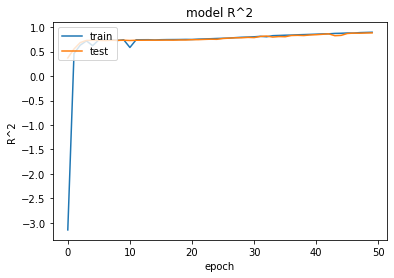

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



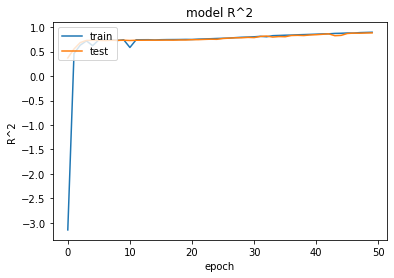

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.01)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 3s 4ms/step - loss: 1.4542 - r2: 0.8352 - mse: 3.8469 - mae: 1.4542 - mape: 11.3917 - val_loss: 2.0283 - val_r2: 0.7099 - val_mse: 6.7732 - val_mae: 2.0283 - val_mape: 17.3518
Epoch 2/50
792/792 [==============================] - 3s 3ms/step - loss: 1.2326 - r2: 0.8738 - mse: 2.9427 - mae: 1.2326 - mape: 9.7123 - val_loss: 2.2076 - val_r2: 0.7432 - val_mse: 6.0138 - val_mae: 2.2076 - val_mape: 15.6451
Epoch 3/50
792/792 [==============================] - 3s 3ms/step - loss: 1.1539 - r2: 0.8894 - mse: 2.5838 - mae: 1.1539 - mape: 9.0708 - val_loss: 1.6636 - val_r2: 0.7886 - val_mse: 4.9364 - val_mae: 1.6636 - val_mape: 13.7701
Epoch 4/50
792/792 [==============================] - 3s 3ms/step - loss: 1.1007 - r2: 0.9012 - mse: 2.3117 - mae: 1.1007 - mape: 8.6458 - val_loss: 0.7705 - val_r2: 0.9202 - val_mse: 1.8644 - val_mae: 0.7705 - val_mape: 6.4485
Epoch 5/50
792/792 [==============================] - 3s 3ms/step - loss: 1.0430 - r

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 1ms/step - loss: 1.0033 - r2: 0.9423 - mse: 1.2720 - mae: 1.0033 - mape: 7.0368


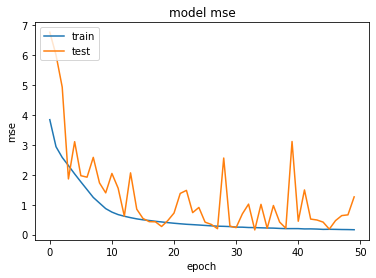

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

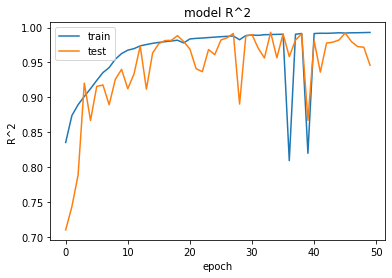

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.1)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[ r2,'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 3s 3ms/step - loss: 1.7767 - r2: 0.7896 - mse: 4.9110 - mae: 1.7767 - mape: 13.7285 - val_loss: 7.8951 - val_r2: -4.7884 - val_mse: 135.6519 - val_mae: 7.8951 - val_mape: 48.8094
Epoch 2/50
792/792 [==============================] - 2s 3ms/step - loss: 1.2202 - r2: 0.8946 - mse: 2.4090 - mae: 1.2202 - mape: 9.3557 - val_loss: 0.9001 - val_r2: 0.9512 - val_mse: 1.1412 - val_mae: 0.9001 - val_mape: 7.4059
Epoch 3/50
792/792 [==============================] - 3s 3ms/step - loss: 0.9344 - r2: 0.9432 - mse: 1.3030 - mae: 0.9344 - mape: 7.2623 - val_loss: 3.3365 - val_r2: -0.2127 - val_mse: 28.4385 - val_mae: 3.3365 - val_mape: 20.7109
Epoch 4/50
792/792 [==============================] - 3s 3ms/step - loss: 0.7872 - r2: 0.9598 - mse: 0.9411 - mae: 0.7872 - mape: 6.2395 - val_loss: 1.4801 - val_r2: 0.8655 - val_mse: 3.1387 - val_mae: 1.4801 - val_mape: 11.7713
Epoch 5/50
792/792 [==============================] - 3s 3ms/step - loss: 0.701

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.4945 - r2: 0.9809 - mse: 0.4186 - mae: 0.4945 - mape: 3.7754


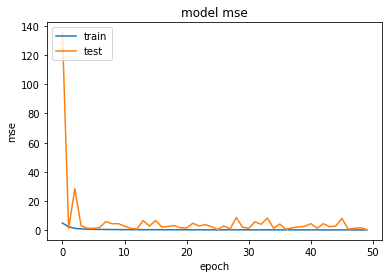

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

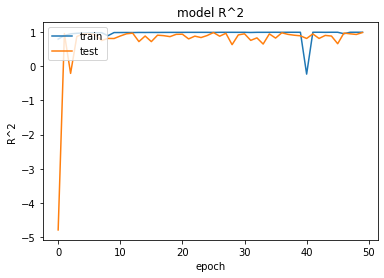

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.001)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 5s 5ms/step - loss: 0.2515 - r2: 0.9956 - mse: 0.1012 - mae: 0.2515 - mape: 2.0648 - val_loss: 0.2767 - val_r2: 0.9948 - val_mse: 0.1205 - val_mae: 0.2767 - val_mape: 2.2634
Epoch 2/50
792/792 [==============================] - 3s 4ms/step - loss: 0.2456 - r2: 0.9959 - mse: 0.0961 - mae: 0.2456 - mape: 2.0165 - val_loss: 0.2685 - val_r2: 0.9952 - val_mse: 0.1132 - val_mae: 0.2685 - val_mape: 2.2312
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 0.2434 - r2: 0.9959 - mse: 0.0943 - mae: 0.2434 - mape: 1.9981 - val_loss: 0.2817 - val_r2: 0.9947 - val_mse: 0.1248 - val_mae: 0.2817 - val_mape: 2.4771
Epoch 4/50
792/792 [==============================] - 3s 4ms/step - loss: 0.2414 - r2: 0.9960 - mse: 0.0927 - mae: 0.2414 - mape: 1.9825 - val_loss: 0.3104 - val_r2: 0.9931 - val_mse: 0.1621 - val_mae: 0.3104 - val_mape: 2.4118
Epoch 5/50
792/792 [==============================] - 3s 3ms/step - loss: 0.2399 - r2: 0

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.3255 - r2: 0.9920 - mse: 0.1778 - mae: 0.3255 - mape: 2.6703


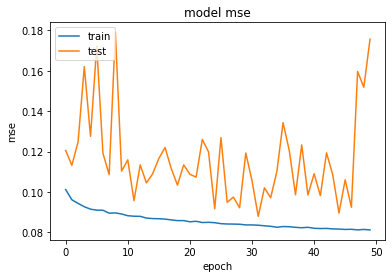

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

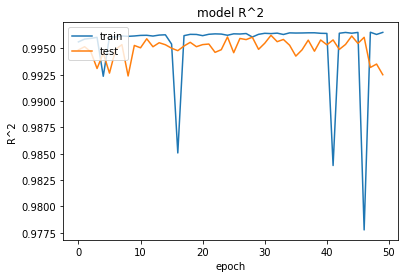

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.01)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4906 - r2: 0.9819 - mse: 0.4196 - mae: 0.4906 - mape: 4.0353 - val_loss: 0.4656 - val_r2: 0.9844 - val_mse: 0.3658 - val_mae: 0.4656 - val_mape: 3.5400
Epoch 2/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4144 - r2: 0.9882 - mse: 0.2783 - mae: 0.4144 - mape: 3.4171 - val_loss: 0.7839 - val_r2: 0.9611 - val_mse: 0.9120 - val_mae: 0.7839 - val_mape: 6.2637
Epoch 3/50
792/792 [==============================] - 3s 3ms/step - loss: 0.3902 - r2: 0.9894 - mse: 0.2458 - mae: 0.3902 - mape: 3.2200 - val_loss: 0.4044 - val_r2: 0.9850 - val_mse: 0.3509 - val_mae: 0.4044 - val_mape: 3.1618
Epoch 4/50
792/792 [==============================] - 3s 3ms/step - loss: 0.3747 - r2: 0.9900 - mse: 0.2272 - mae: 0.3747 - mape: 3.0879 - val_loss: 0.5336 - val_r2: 0.9819 - val_mse: 0.4246 - val_mae: 0.5336 - val_mape: 4.9067
Epoch 5/50
792/792 [==============================] - 3s 3ms/step - loss: 0.3669 - r2: 0

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 1ms/step - loss: 0.4205 - r2: 0.9866 - mse: 0.2967 - mae: 0.4205 - mape: 3.2754


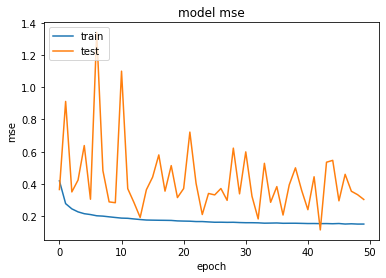

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

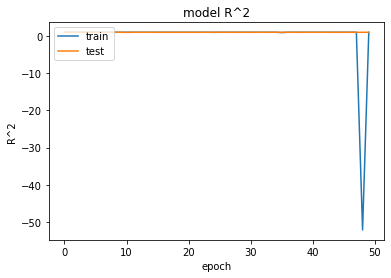

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.1)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 4s 4ms/step - loss: 1.6123 - r2: 0.7891 - mse: 4.8524 - mae: 1.6123 - mape: 13.7269 - val_loss: 1.8774 - val_r2: 0.7745 - val_mse: 5.2908 - val_mae: 1.8774 - val_mape: 19.3731
Epoch 2/50
792/792 [==============================] - 3s 3ms/step - loss: 1.3335 - r2: 0.8793 - mse: 2.8042 - mae: 1.3335 - mape: 11.4158 - val_loss: 1.3438 - val_r2: 0.8775 - val_mse: 2.8696 - val_mae: 1.3438 - val_mape: 12.0924
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 1.2715 - r2: 0.8789 - mse: 2.5346 - mae: 1.2715 - mape: 10.9771 - val_loss: 1.9263 - val_r2: 0.7548 - val_mse: 5.7636 - val_mae: 1.9263 - val_mape: 20.0877
Epoch 4/50
792/792 [==============================] - 3s 4ms/step - loss: 1.2370 - r2: 0.8975 - mse: 2.4027 - mae: 1.2370 - mape: 10.7007 - val_loss: 1.4606 - val_r2: 0.8417 - val_mse: 3.7134 - val_mae: 1.4606 - val_mape: 10.5264
Epoch 5/50
792/792 [==============================] - 3s 4ms/step - loss: 1.2153

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 1.5835 - r2: 0.8309 - mse: 3.8518 - mae: 1.5835 - mape: 13.9132


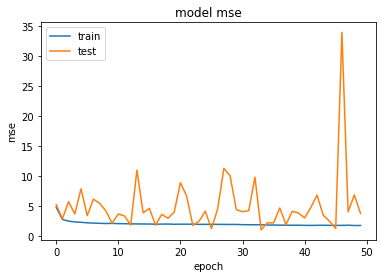

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

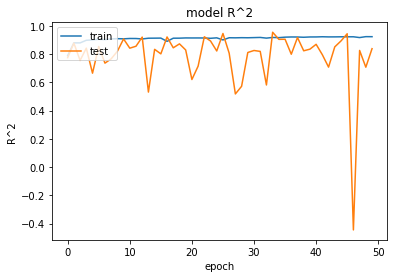

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 4s 4ms/step - loss: 0.6054 - r2: 0.9712 - mse: 0.6740 - mae: 0.6054 - mape: 4.8456 - val_loss: 0.5163 - val_r2: 0.9814 - val_mse: 0.4340 - val_mae: 0.5163 - val_mape: 4.1318
Epoch 2/50
792/792 [==============================] - 3s 4ms/step - loss: 0.5037 - r2: 0.9821 - mse: 0.4161 - mae: 0.5037 - mape: 4.0691 - val_loss: 0.5056 - val_r2: 0.9822 - val_mse: 0.4165 - val_mae: 0.5056 - val_mape: 4.0500
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4954 - r2: 0.9824 - mse: 0.4033 - mae: 0.4954 - mape: 4.0145 - val_loss: 0.4987 - val_r2: 0.9826 - val_mse: 0.4072 - val_mae: 0.4987 - val_mape: 4.0223
Epoch 4/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4897 - r2: 0.9831 - mse: 0.3949 - mae: 0.4897 - mape: 3.9801 - val_loss: 0.4931 - val_r2: 0.9831 - val_mse: 0.3956 - val_mae: 0.4931 - val_mape: 3.9822
Epoch 5/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4856 - r2: 0

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.4443 - r2: 0.9850 - mse: 0.3317 - mae: 0.4443 - mape: 3.7499


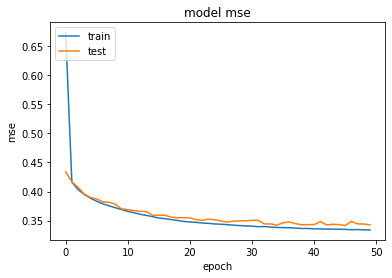

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

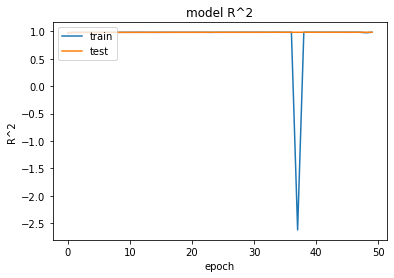

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.01)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4549 - r2: 0.9850 - mse: 0.3477 - mae: 0.4549 - mape: 3.8349 - val_loss: 0.4576 - val_r2: 0.9849 - val_mse: 0.3532 - val_mae: 0.4576 - val_mape: 3.8370
Epoch 2/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4526 - r2: 0.9853 - mse: 0.3441 - mae: 0.4526 - mape: 3.8154 - val_loss: 0.4736 - val_r2: 0.9844 - val_mse: 0.3654 - val_mae: 0.4736 - val_mape: 4.0406
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4534 - r2: 0.9852 - mse: 0.3459 - mae: 0.4534 - mape: 3.8339 - val_loss: 0.5036 - val_r2: 0.9825 - val_mse: 0.4085 - val_mae: 0.5036 - val_mape: 4.4929
Epoch 4/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4513 - r2: 0.9854 - mse: 0.3422 - mae: 0.4513 - mape: 3.8181 - val_loss: 0.5211 - val_r2: 0.9804 - val_mse: 0.4605 - val_mae: 0.5211 - val_mape: 4.6121
Epoch 5/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4502 - r2: 0

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.4277 - r2: 0.9868 - mse: 0.2893 - mae: 0.4277 - mape: 3.7483


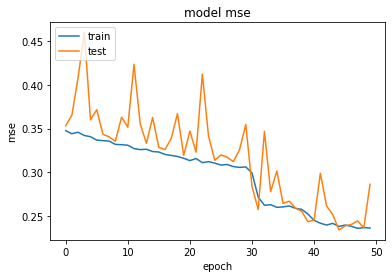

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

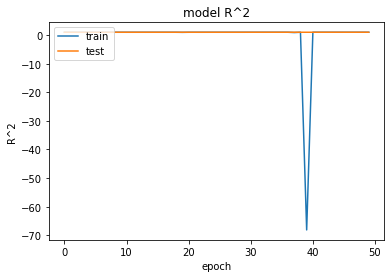

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.1)
model1.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history = model1.fit(X_train, y_train, epochs=50, validation_split=0.1,batch_size=128)

Epoch 1/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4826 - r2: 0.9822 - mse: 0.4150 - mae: 0.4826 - mape: 4.1707 - val_loss: 1.3263 - val_r2: 0.9033 - val_mse: 2.2573 - val_mae: 1.3263 - val_mape: 12.3511
Epoch 2/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4688 - r2: 0.9840 - mse: 0.3704 - mae: 0.4688 - mape: 4.0431 - val_loss: 0.7357 - val_r2: 0.9661 - val_mse: 0.7925 - val_mae: 0.7357 - val_mape: 6.3356
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4691 - r2: 0.9841 - mse: 0.3696 - mae: 0.4691 - mape: 4.0619 - val_loss: 0.4950 - val_r2: 0.9827 - val_mse: 0.4058 - val_mae: 0.4950 - val_mape: 4.2261
Epoch 4/50
792/792 [==============================] - 6s 8ms/step - loss: 0.4561 - r2: 0.9850 - mse: 0.3454 - mae: 0.4561 - mape: 3.9511 - val_loss: 1.5430 - val_r2: 0.8744 - val_mse: 2.9328 - val_mae: 1.5430 - val_mape: 14.0685
Epoch 5/50
792/792 [==============================] - 6s 7ms/step - loss: 0.4704 - r2:

In [ ]:
score = model1.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.8451 - r2: 0.9547 - mse: 0.9965 - mae: 0.8451 - mape: 7.8735


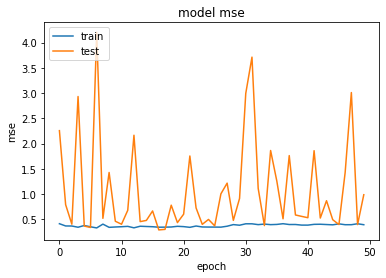

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

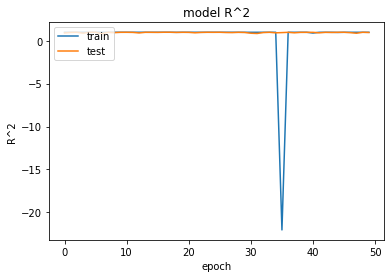

In [ ]:
plt.plot(history.history['r2'])
plt.plot(history.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

DNN with 5 hidden layers

In [ ]:
model2 = Sequential()
#input
model2.add(Dense(64, input_dim=10, activation='relu'))
#hidden
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
#outpu
model2.add(Dense(1))

In [ ]:
#compile
opt = SGD(learning_rate=0.001)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 4s 2ms/step - loss: 4.8954 - r2: -1.2806 - mse: 52.5889 - mae: 4.8954 - mape: 37.9323 - val_loss: 2.0682 - val_r2: 0.6913 - val_mse: 7.0714 - val_mae: 2.0682 - val_mape: 15.7010
Epoch 2/50
1583/1583 [==============================] - 3s 2ms/step - loss: 1.8009 - r2: 0.7425 - mse: 5.9006 - mae: 1.8009 - mape: 15.0361 - val_loss: 1.7564 - val_r2: 0.7437 - val_mse: 5.8689 - val_mae: 1.7564 - val_mape: 14.3492
Epoch 3/50
1583/1583 [==============================] - 3s 2ms/step - loss: 1.6570 - r2: 0.7689 - mse: 5.2825 - mae: 1.6570 - mape: 13.7487 - val_loss: 1.5078 - val_r2: 0.7814 - val_mse: 4.9997 - val_mae: 1.5078 - val_mape: 12.5840
Epoch 4/50
1583/1583 [==============================] - 3s 2ms/step - loss: 1.2697 - r2: 0.8300 - mse: 3.8799 - mae: 1.2697 - mape: 10.4570 - val_loss: 2.3972 - val_r2: 0.5907 - val_mse: 9.3201 - val_mae: 2.3972 - val_mape: 19.6297
Epoch 5/50
1583/1583 [==============================] - 3s 2ms/step - 

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 1ms/step - loss: 0.4556 - r2: 0.9832 - mse: 0.3684 - mae: 0.4556 - mape: 3.7091


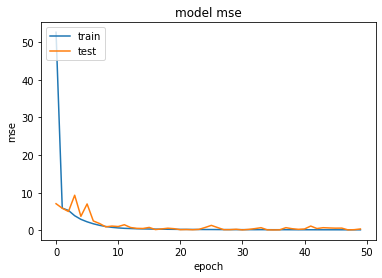

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


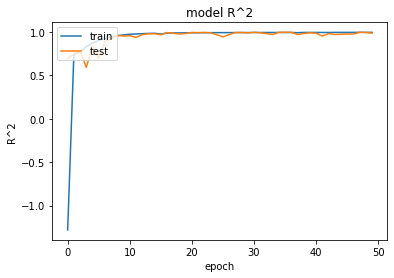

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.01)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 4s 2ms/step - loss: 1.5630 - r2: 0.8332 - mse: 3.8291 - mae: 1.5630 - mape: 12.3788 - val_loss: 1.2534 - val_r2: 0.8985 - val_mse: 2.3296 - val_mae: 1.2534 - val_mape: 12.2013
Epoch 2/50
1583/1583 [==============================] - 3s 2ms/step - loss: 1.0419 - r2: 0.9320 - mse: 1.5646 - mae: 1.0419 - mape: 8.4153 - val_loss: 1.8836 - val_r2: 0.7695 - val_mse: 5.2706 - val_mae: 1.8836 - val_mape: 12.4433
Epoch 3/50
1583/1583 [==============================] - 3s 2ms/step - loss: 0.8426 - r2: 0.9559 - mse: 1.0115 - mae: 0.8426 - mape: 6.8275 - val_loss: 1.0576 - val_r2: 0.9237 - val_mse: 1.7560 - val_mae: 1.0576 - val_mape: 10.7144
Epoch 4/50
1583/1583 [==============================] - 3s 2ms/step - loss: 0.7185 - r2: 0.9675 - mse: 0.7473 - mae: 0.7185 - mape: 5.8120 - val_loss: 1.2973 - val_r2: 0.9030 - val_mse: 2.2357 - val_mae: 1.2973 - val_mape: 11.6965
Epoch 5/50
1583/1583 [==============================] - 3s 2ms/step - loss:

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.4630 - r2: 0.9785 - mse: 0.4674 - mae: 0.4630 - mape: 3.4575


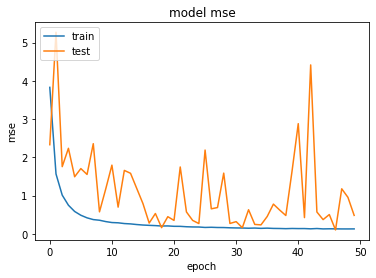

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

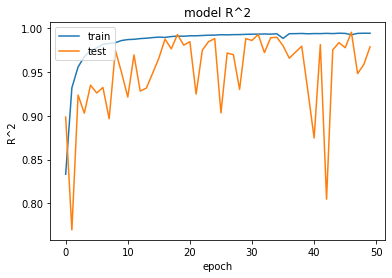

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.1)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 4s 2ms/step - loss: 1.4410 - r2: 0.8197 - mse: 3.3147 - mae: 1.4410 - mape: 11.4913 - val_loss: 1.7840 - val_r2: 0.7766 - val_mse: 5.0824 - val_mae: 1.7840 - val_mape: 15.3475
Epoch 2/50
1583/1583 [==============================] - 3s 2ms/step - loss: 0.9585 - r2: 0.9367 - mse: 1.4564 - mae: 0.9585 - mape: 8.0983 - val_loss: 2.3799 - val_r2: 0.2912 - val_mse: 16.0652 - val_mae: 2.3799 - val_mape: 15.6085
Epoch 3/50
1583/1583 [==============================] - 4s 2ms/step - loss: 0.8304 - r2: 0.9516 - mse: 1.1152 - mae: 0.8304 - mape: 7.0785 - val_loss: 1.1817 - val_r2: 0.9059 - val_mse: 2.1638 - val_mae: 1.1817 - val_mape: 11.6210
Epoch 4/50
1583/1583 [==============================] - 3s 2ms/step - loss: 0.7577 - r2: 0.9599 - mse: 0.9199 - mae: 0.7577 - mape: 6.4824 - val_loss: 0.7126 - val_r2: 0.9632 - val_mse: 0.8358 - val_mae: 0.7126 - val_mape: 6.0873
Epoch 5/50
1583/1583 [==============================] - 3s 2ms/step - loss:

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.6645 - r2: 0.9546 - mse: 0.9837 - mae: 0.6645 - mape: 4.7039


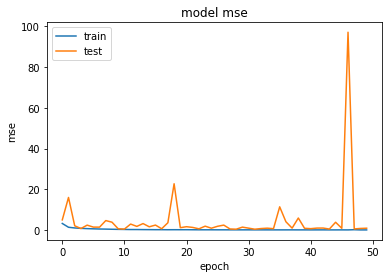

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

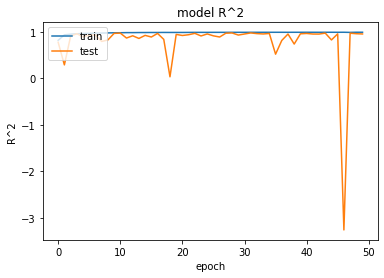

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.001)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 6s 3ms/step - loss: 0.2468 - r2: 0.9957 - mse: 0.0982 - mae: 0.2468 - mape: 2.0252 - val_loss: 0.2495 - val_r2: 0.9957 - val_mse: 0.0986 - val_mae: 0.2495 - val_mape: 2.0248
Epoch 2/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.2424 - r2: 0.9959 - mse: 0.0937 - mae: 0.2424 - mape: 1.9873 - val_loss: 0.2774 - val_r2: 0.9946 - val_mse: 0.1231 - val_mae: 0.2774 - val_mape: 2.1786
Epoch 3/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.2416 - r2: 0.9959 - mse: 0.0930 - mae: 0.2416 - mape: 1.9874 - val_loss: 0.2694 - val_r2: 0.9949 - val_mse: 0.1159 - val_mae: 0.2694 - val_mape: 2.1235
Epoch 4/50
1583/1583 [==============================] - 4s 3ms/step - loss: 0.2408 - r2: 0.9959 - mse: 0.0922 - mae: 0.2408 - mape: 1.9776 - val_loss: 0.2459 - val_r2: 0.9958 - val_mse: 0.0956 - val_mae: 0.2459 - val_mape: 1.9806
Epoch 5/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.24

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.2490 - r2: 0.9955 - mse: 0.0978 - mae: 0.2490 - mape: 2.0563


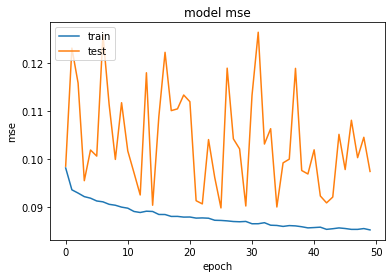

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

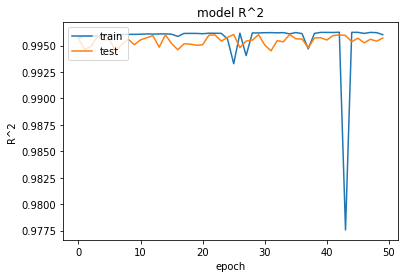

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.01)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 6s 3ms/step - loss: 0.4959 - r2: 0.9811 - mse: 0.4365 - mae: 0.4959 - mape: 4.1176 - val_loss: 0.4601 - val_r2: 0.9845 - val_mse: 0.3546 - val_mae: 0.4601 - val_mape: 3.7608
Epoch 2/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.4439 - r2: 0.9854 - mse: 0.3320 - mae: 0.4439 - mape: 3.7017 - val_loss: 0.5969 - val_r2: 0.9717 - val_mse: 0.6457 - val_mae: 0.5969 - val_mape: 4.2567
Epoch 3/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.4245 - r2: 0.9870 - mse: 0.2998 - mae: 0.4245 - mape: 3.5771 - val_loss: 0.7463 - val_r2: 0.9578 - val_mse: 0.9784 - val_mae: 0.7463 - val_mape: 8.0389
Epoch 4/50
1583/1583 [==============================] - 5s 3ms/step - loss: 0.4126 - r2: 0.9870 - mse: 0.2868 - mae: 0.4126 - mape: 3.4712 - val_loss: 0.6699 - val_r2: 0.9675 - val_mse: 0.7441 - val_mae: 0.6699 - val_mape: 6.0835
Epoch 5/50
1583/1583 [==============================] - 6s 4ms/step - loss: 0.40

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 0.3777 - r2: 0.9898 - mse: 0.2275 - mae: 0.3777 - mape: 3.5393


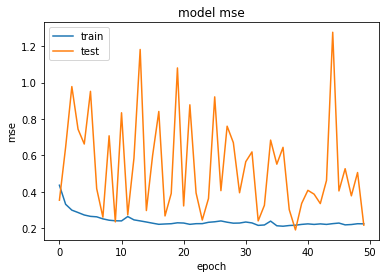

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

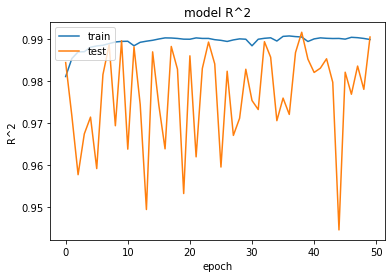

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.1)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 7s 4ms/step - loss: 4.3018 - r2: -2.4704 - mse: 72.2853 - mae: 4.3018 - mape: 40.5522 - val_loss: 3.9785 - val_r2: -0.0232 - val_mse: 23.8790 - val_mae: 3.9785 - val_mape: 36.6720
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9807 - r2: -0.0250 - mse: 23.8516 - mae: 3.9807 - mape: 38.0054 - val_loss: 3.9695 - val_r2: -0.0184 - val_mse: 23.7759 - val_mae: 3.9695 - val_mape: 37.6293
Epoch 3/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9799 - r2: -0.0377 - mse: 23.8487 - mae: 3.9799 - mape: 38.0163 - val_loss: 3.9700 - val_r2: -0.0187 - val_mse: 23.7805 - val_mae: 3.9700 - val_mape: 37.2200
Epoch 4/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9803 - r2: -0.0179 - mse: 23.8469 - mae: 3.9803 - mape: 37.9795 - val_loss: 3.9737 - val_r2: -0.0207 - val_mse: 23.8231 - val_mae: 3.9737 - val_mape: 36.9008
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 3.9757 - r2: -0.0360 - mse: 23.9192 - mae: 3.9757 - mape: 37.5600


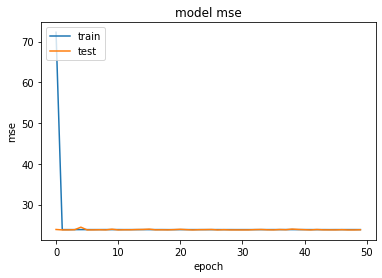

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

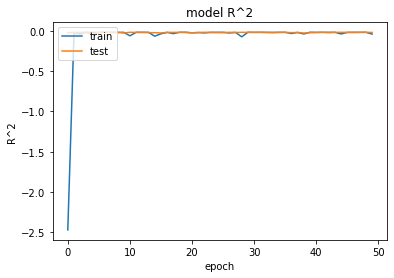

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 7s 4ms/step - loss: 3.9779 - r2: -0.0164 - mse: 23.8187 - mae: 3.9779 - mape: 37.7495 - val_loss: 3.9693 - val_r2: -0.0183 - val_mse: 23.7731 - val_mae: 3.9693 - val_mape: 37.3611
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9770 - r2: -0.0166 - mse: 23.8104 - mae: 3.9770 - mape: 37.9011 - val_loss: 3.9692 - val_r2: -0.0183 - val_mse: 23.7720 - val_mae: 3.9692 - val_mape: 37.5067
Epoch 3/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9770 - r2: -0.0792 - mse: 23.8106 - mae: 3.9770 - mape: 37.9751 - val_loss: 3.9692 - val_r2: -0.0183 - val_mse: 23.7719 - val_mae: 3.9692 - val_mape: 37.5034
Epoch 4/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9769 - r2: -0.0174 - mse: 23.8104 - mae: 3.9769 - mape: 37.9660 - val_loss: 3.9692 - val_r2: -0.0183 - val_mse: 23.7720 - val_mae: 3.9692 - val_mape: 37.5069
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 3.9727 - r2: -0.0343 - mse: 23.8792 - mae: 3.9727 - mape: 38.0885


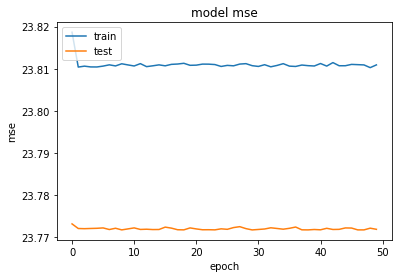

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

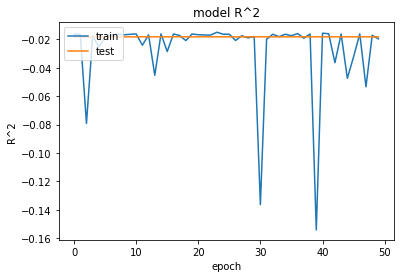

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.01)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 7s 4ms/step - loss: 3.9773 - r2: -0.0165 - mse: 23.8146 - mae: 3.9773 - mape: 38.0002 - val_loss: 3.9707 - val_r2: -0.0191 - val_mse: 23.7885 - val_mae: 3.9707 - val_mape: 37.1318
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9774 - r2: -0.0197 - mse: 23.8143 - mae: 3.9774 - mape: 37.9483 - val_loss: 3.9692 - val_r2: -0.0183 - val_mse: 23.7718 - val_mae: 3.9692 - val_mape: 37.4891
Epoch 3/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9773 - r2: -0.0176 - mse: 23.8157 - mae: 3.9773 - mape: 37.9901 - val_loss: 3.9697 - val_r2: -0.0185 - val_mse: 23.7790 - val_mae: 3.9697 - val_mape: 37.6853
Epoch 4/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9772 - r2: -0.0171 - mse: 23.8139 - mae: 3.9772 - mape: 37.9724 - val_loss: 3.9696 - val_r2: -0.0185 - val_mse: 23.7774 - val_mae: 3.9696 - val_mape: 37.6588
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 2ms/step - loss: 3.9730 - r2: -0.0344 - mse: 23.8820 - mae: 3.9730 - mape: 38.2130


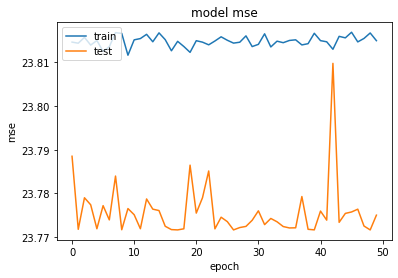

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

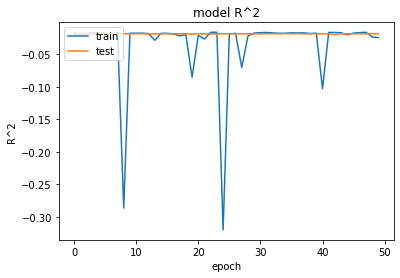

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.1)
model2.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 8s 4ms/step - loss: 3.9800 - r2: -0.0185 - mse: 23.8437 - mae: 3.9800 - mape: 37.9960 - val_loss: 3.9720 - val_r2: -0.0198 - val_mse: 23.8108 - val_mae: 3.9720 - val_mape: 37.9925
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9801 - r2: -0.0193 - mse: 23.8499 - mae: 3.9801 - mape: 38.0031 - val_loss: 3.9721 - val_r2: -0.0198 - val_mse: 23.8036 - val_mae: 3.9721 - val_mape: 37.0139
Epoch 3/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9803 - r2: -0.0193 - mse: 23.8511 - mae: 3.9803 - mape: 37.9794 - val_loss: 3.9713 - val_r2: -0.0194 - val_mse: 23.7949 - val_mae: 3.9713 - val_mape: 37.0769
Epoch 4/50
1583/1583 [==============================] - 6s 4ms/step - loss: 3.9799 - r2: -0.0198 - mse: 23.8527 - mae: 3.9799 - mape: 37.9727 - val_loss: 3.9711 - val_r2: -0.0193 - val_mse: 23.7978 - val_mae: 3.9711 - val_mape: 37.8918
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model2.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 2ms/step - loss: 3.9730 - r2: -0.0345 - mse: 23.8827 - mae: 3.9730 - mape: 38.2284


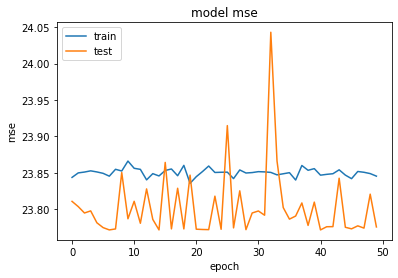

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

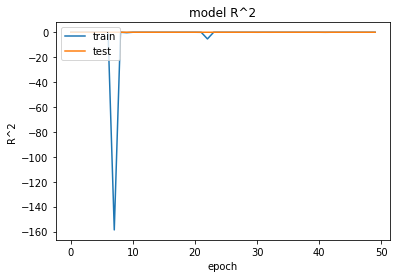

In [ ]:
plt.plot(history2.history['r2'])
plt.plot(history2.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

DNN with 25 hidden layer

In [ ]:
model3 = Sequential()
#input
model3.add(Dense(64, input_dim=10, activation='relu'))
#hidden
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(64, activation='relu'))
#outpu
model3.add(Dense(1))

In [ ]:
#compile
opt = SGD(learning_rate=0.001)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 11s 6ms/step - loss: 7.5264 - r2: -2.9060 - mse: 90.7366 - mae: 7.5264 - mape: 57.5986 - val_loss: 3.9655 - val_r2: -0.0164 - val_mse: 23.7271 - val_mae: 3.9655 - val_mape: 37.2217
Epoch 2/50
1583/1583 [==============================] - 10s 6ms/step - loss: 3.9433 - r2: -1.9860e-04 - mse: 23.4307 - mae: 3.9433 - mape: 37.6999 - val_loss: 3.7302 - val_r2: 0.0942 - val_mse: 21.1530 - val_mae: 3.7302 - val_mape: 35.1196
Epoch 3/50
1583/1583 [==============================] - 10s 6ms/step - loss: 2.2700 - r2: 0.6268 - mse: 8.6147 - mae: 2.2700 - mape: 20.2857 - val_loss: 3.6872 - val_r2: 0.2485 - val_mse: 17.1818 - val_mae: 3.6872 - val_mape: 26.0609
Epoch 4/50
1583/1583 [==============================] - 10s 6ms/step - loss: 1.6763 - r2: 0.7850 - mse: 4.9442 - mae: 1.6763 - mape: 14.1061 - val_loss: 2.6876 - val_r2: 0.5945 - val_mse: 9.3105 - val_mae: 2.6876 - val_mape: 19.2341
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 4s 3ms/step - loss: 0.3999 - r2: 0.9865 - mse: 0.3064 - mae: 0.3999 - mape: 4.2296


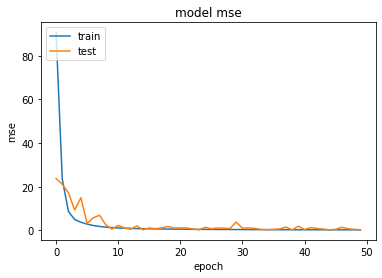

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


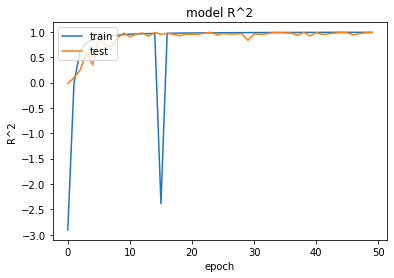

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.01)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 12s 7ms/step - loss: 1.6759 - r2: 0.8095 - mse: 4.4296 - mae: 1.6759 - mape: 14.2104 - val_loss: 2.1823 - val_r2: 0.6738 - val_mse: 7.5502 - val_mae: 2.1823 - val_mape: 15.5619
Epoch 2/50
1583/1583 [==============================] - 9s 6ms/step - loss: 1.2544 - r2: 0.8955 - mse: 2.4124 - mae: 1.2544 - mape: 10.7639 - val_loss: 1.2353 - val_r2: 0.8724 - val_mse: 2.9752 - val_mae: 1.2353 - val_mape: 9.3004
Epoch 3/50
1583/1583 [==============================] - 10s 6ms/step - loss: 1.0965 - r2: 0.9225 - mse: 1.7947 - mae: 1.0965 - mape: 9.3369 - val_loss: 2.7331 - val_r2: 0.5318 - val_mse: 10.8246 - val_mae: 2.7331 - val_mape: 29.0026
Epoch 4/50
1583/1583 [==============================] - 9s 6ms/step - loss: 0.9516 - r2: 0.9408 - mse: 1.3647 - mae: 0.9516 - mape: 8.1561 - val_loss: 3.4979 - val_r2: -0.1259 - val_mse: 25.8776 - val_mae: 3.4979 - val_mape: 21.3520
Epoch 5/50
1583/1583 [==============================] - 9s 6ms/step - 

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 3ms/step - loss: 0.7382 - r2: 0.9468 - mse: 1.2279 - mae: 0.7382 - mape: 8.4484


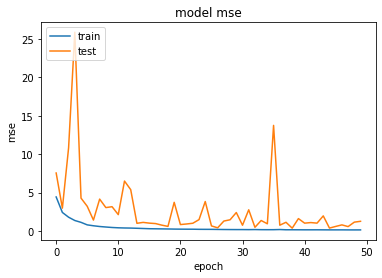

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

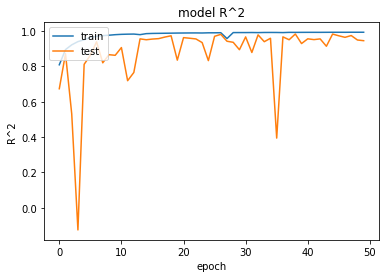

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = SGD(learning_rate=0.1)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 10s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 9s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 9s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


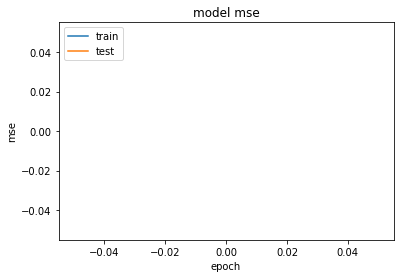

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

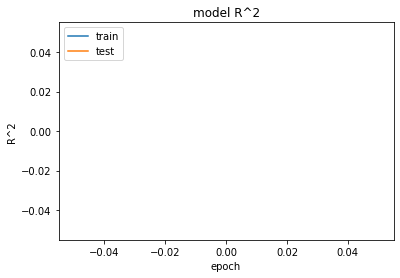

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.001)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 14s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 11s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 11s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape:

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


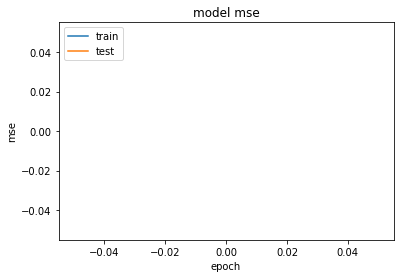

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

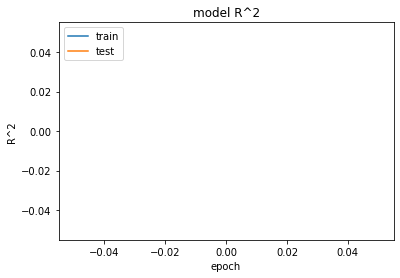

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.01)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 13s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 9s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 9s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 9s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: na

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


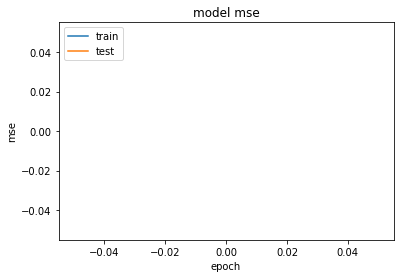

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

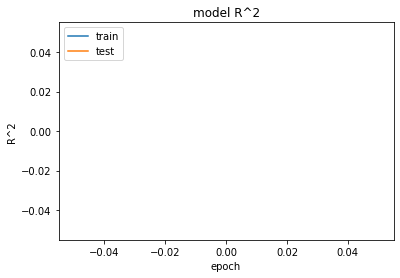

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = RMSprop(learning_rate=0.1)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 12s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 8s 5ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


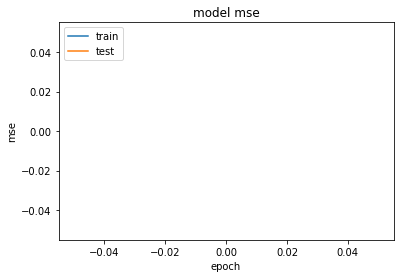

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

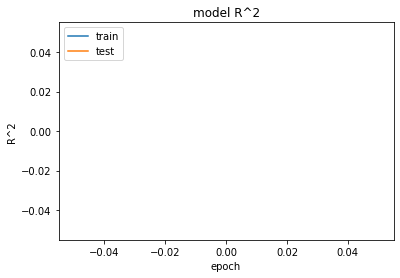

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 12s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 10s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 10s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape:

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 3s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


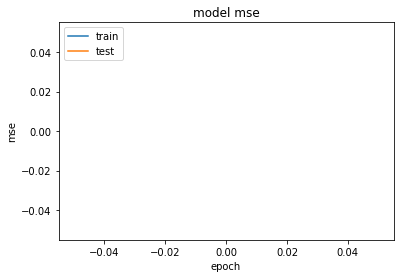

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

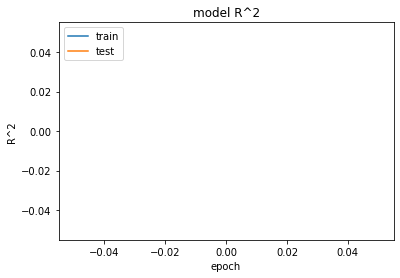

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.01)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 12s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 2/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 3/50
1583/1583 [==============================] - 10s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 4/50
1583/1583 [==============================] - 10s 7ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape: nan
Epoch 5/50
1583/1583 [==============================] - 10s 6ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan - val_loss: nan - val_r2: nan - val_mse: nan - val_mae: nan - val_mape:

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: nan - r2: nan - mse: nan - mae: nan - mape: nan


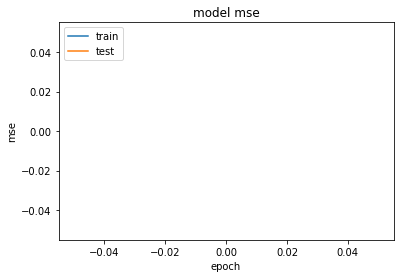

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

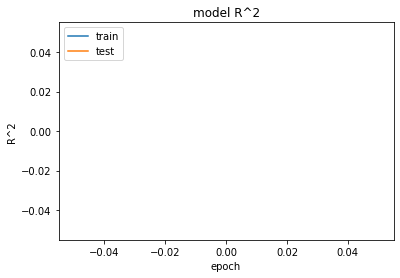

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile
opt = Adam(learning_rate=0.1)
model3.compile(optimizer=opt, loss='mean_absolute_error', metrics=[r2, 'mse', 'mae', 'mape'])

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=64)

Epoch 1/50
1583/1583 [==============================] - 7s 4ms/step - loss: 4.4037 - r2: -0.3260 - mse: 30.8291 - mae: 4.4037 - mape: 39.5642 - val_loss: 4.0078 - val_r2: -0.0151 - val_mse: 24.0903 - val_mae: 4.0078 - val_mape: 37.9765
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 4.0084 - r2: -0.0232 - mse: 24.1276 - mae: 4.0084 - mape: 37.9885 - val_loss: 4.0077 - val_r2: -0.0150 - val_mse: 24.0878 - val_mae: 4.0077 - val_mape: 38.0079
Epoch 3/50
1583/1583 [==============================] - 6s 4ms/step - loss: 4.0091 - r2: -0.0195 - mse: 24.1377 - mae: 4.0091 - mape: 37.9962 - val_loss: 4.0078 - val_r2: -0.0151 - val_mse: 24.0910 - val_mae: 4.0078 - val_mape: 37.9688
Epoch 4/50
1583/1583 [==============================] - 6s 4ms/step - loss: 4.0090 - r2: -0.0185 - mse: 24.1345 - mae: 4.0090 - mape: 38.0044 - val_loss: 4.0074 - val_r2: -0.0147 - val_mse: 24.0819 - val_mae: 4.0074 - val_mape: 38.1039
Epoch 5/50
1583/1583 [==============================] - 

In [ ]:
score = model3.evaluate(X_test, y_test,verbose=1)

1172/1172 [==============================] - 2s 2ms/step - loss: 3.9956 - r2: -0.0394 - mse: 24.0242 - mae: 3.9956 - mape: 37.2757


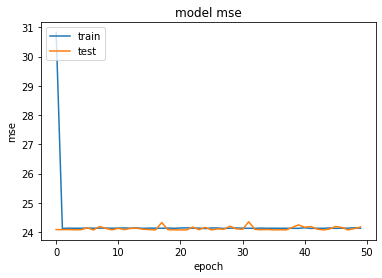

In [ ]:
plt.plot(history3.history['mse'])
plt.plot(history3.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

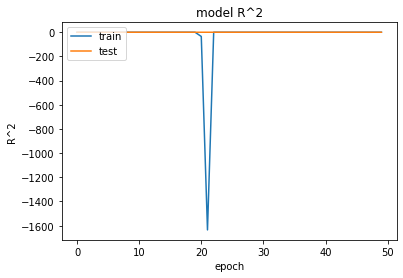

In [ ]:
plt.plot(history3.history['r2'])
plt.plot(history3.history['val_r2'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Compare DNN results with the baseline (LR).

За результатами навчання моделей можна зробити висновок що для певних комбінації ймовірність точного передбачення зросла до 90% а похибка навпахи зменшилась порівнючи з лінвйною регресією. 

Make conclusions:
- 9.1 what models and combinations of hyperparameters worked best? Why?

Найкращою комбінацією була однашарова модель з RMSprop оптимайзером та 0.001 learning rate. 

- 9.2 influence of optimizer?

За допомогою омптимайзера ми прискорюємо пошук цільової функції використовуючи тренувальний датасет. 

- 9.3 influence of learning rate?

Чим менший learning rate тим більша точність і тим меншою буде похибка. Також модель повільніше насичуватиметься та й шанс на оверфід менший. 

- 9.4 influence of DNN architecture?

Про вплив архітектури можна сказати наступне: 
Зі збільшенням кількості прихованих шарів модель швидше насичується.
Велика кількість нейронів у шарах впливає, як і на час навчання так і на точність передбачення.
Різна архітектура вимагає й різних loss функцій. До прикладу: для моделі лише з одним шаром буде достатньо mean_squared_error для моделі з пятьма і більше підходить mean_absolute_error або ж mean_squared_logarithmic_error.
Прихований шар може приймати будь-яку кількість нейронів, але степені двійки проявляють себе найкраще. В моєму випадку я зупинився на 64 нейронах. 

- 9.5 influence of data distribution (linear or non-linear?)

DNN це приклад нелінійного розподілу данних. Порівнявши його з лінійної регресією можна зробити висновок, що він набагато краще передбачає таргет. Лінійна регрсія показує хороші результати лише не данних з нормального (гаусівського) розподілу.
